데이터셋 : auto_mpg.csv  
목적 : 연비 예측  
학습방법 : 지도학습 > 회귀  
알고리즘 : LinearRegression  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataDF = pd.read_csv(r'C:\Users\KDP-17\EX_PANDAS6\MachineLearning\day_03\auto_mpg.csv')
dataDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
dataDF['mpg']=dataDF['mpg']*0.425
dataDF['mpg']

0       7.650
1       6.375
2       7.650
3       6.800
4       7.225
        ...  
393    11.475
394    18.700
395    13.600
396    11.900
397    13.175
Name: mpg, Length: 398, dtype: float64

In [5]:
dataDF.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


<Axes: >

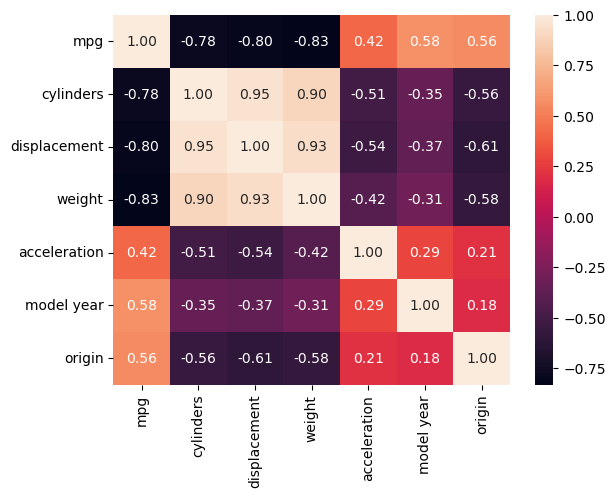

In [6]:
sns.heatmap(dataDF.corr(numeric_only=True),annot=True,fmt='.2f')

피쳐 : displacement  
타겟 : mpg

In [7]:
# 피쳐 설정
displacement = dataDF['displacement']
displacementDF = pd.DataFrame(displacement)

# 타겟 설정
mpgSR = dataDF['mpg']
mpgSR

0       7.650
1       6.375
2       7.650
3       6.800
4       7.225
        ...  
393    11.475
394    18.700
395    13.600
396    11.900
397    13.175
Name: mpg, Length: 398, dtype: float64

타겟과 피쳐의 상관관계 분석

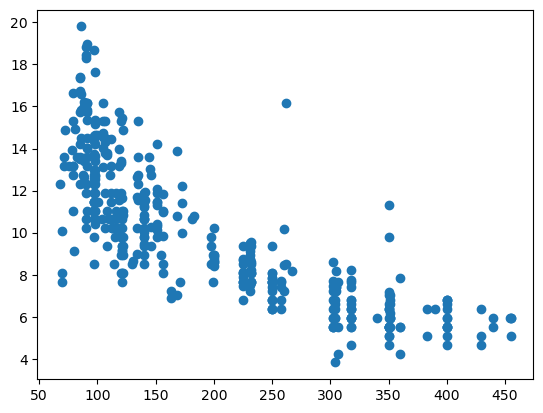

In [8]:
plt.scatter(displacementDF.values,mpgSR)
plt.show()

학습 준비

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(displacementDF,
                                                    mpgSR,
                                                    random_state=10)

In [11]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test  : {X_test.shape}, {X_test.ndim}D')
print(f'y_test  : {y_test.shape}, {y_test.ndim}D')

X_train : (298, 1), 2D
y_train : (298,), 1D
X_test  : (100, 1), 2D
y_test  : (100,), 1D


피쳐 스케일링

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# 스케일러 인스턴스 생성
scaler = MinMaxScaler()

# 스케일러에 데이터셋 적용
scaler.fit(X_train)

MinMaxScaler()

In [14]:
# 학습용, 테스트용 데이터 스케일링 진행
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

학습 진행

In [15]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [16]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

# 학습 진행
model.fit(X_train_scaled,y_train)

LinearRegression()

In [17]:
# 학습 후 모델 파라미터
print(model.coef_)
print(model.intercept_)

[-9.88629436]
13.280407578769939


모델 성능 평가

In [22]:
score = model.score(X_test_scaled,y_test)
score

0.625917860054303